In [1]:
# Импорт модулей
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import cv2
from google.colab.patches import cv2_imshow

In [2]:
# Подключение гугл диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Разархивируем датасет с фотографиями машин.

!unzip /content/drive/My\ Drive/dataset.zip -d /content/gdrive/My\ Drive/

Archive:  /content/drive/My Drive/dataset.zip
   creating: /content/drive/My Drive/train/
   creating: /content/drive/My Drive/train/images/
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_13_50-743914_png.rf.5e0a97c91711c25ecbe47ca12a076add.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_13_50-743914_png.rf.b67f8bfcc4df30527fa2b3e7a7bea990.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_13_50-743914_png.rf.ff34bb7a54aec3136f3626d2394190b2.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_19_03-040754_png.rf.3b39c795d5c4b046ab3591b0cdb6f31c.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_19_03-040754_png.rf.91b4aa04e1787b56de799b14f45c78a9.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_19_03-040754_png.rf.a0c77e74d4728de408e36e19a198ffdf.jpg  
  inflating: /content/drive/My Drive/train/images/2022-09-08T15_19_04-566255_png.rf.1a36a13815dbc826719eed992501acd3.jpg 

In [3]:
# Переходим в папку куда будем копировать данные с гитхаба
%cd drive/MyDrive/

# Копируем данные с гитхаба 
!git clone https://github.com/ultralytics/yolov5

# После копирования переходим в папку yolov5 и ставим список библиотек из файла
%cd yolov5
%pip install -qr requirements.txt

/content/drive/MyDrive
Cloning into 'yolov5'...
remote: Enumerating objects: 13140, done.
remote: Counting objects: 100% (296/296), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 13140 (delta 200), reused 226 (delta 155), pack-reused 12844
Receiving objects: 100% (13140/13140), 13.17 MiB | 10.37 MiB/s, done.
Resolving deltas: 100% (9030/9030), done.
/content/drive/MyDrive/yolov5
     |████████████████████████████████| 1.6 MB 5.2 MB/s 


In [4]:
# Ставим библиотеку для визуализации обучения модели
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.9 MB/s 
     |████████████████████████████████| 162 kB 64.6 MB/s 
     |████████████████████████████████| 181 kB 74.2 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 158 kB 75.0 MB/s 
     |████████████████████████████████| 157 kB 76.3 MB/s 
     |████████████████████████████████| 157 kB 74.7 MB/s 
     |████████████████████████████████| 157 kB 72.8 MB/s 
     |████████████████████████████████| 157 kB 74.9 MB/s 
     |████████████████████████████████| 157 kB 71.1 MB/s 
     |████████████████████████████████| 157 kB 60.8 MB/s 
     |████████████████████████████████| 157 kB 72.9 MB/s 
     |████████████████████████████████| 156 kB 71.4 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=8488bc585ffc74476679b70297f10f074e9ebc961fbdf429aafb80a39f16

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Импортируем установленную библиотеку для визуализации обучения модели
import wandb
wandb.login(anonymous='must')

In [8]:
%cd ../yolov5

/content/drive/MyDrive/yolov5


In [10]:
# Задаём параметры обучения модели. Размер картинок 640 на 640 (такой размер фото в датасете).
# Батчсайз 10, количество эпох 10.
# Путь к yaml файлу где указано количество классов и пути к папкам с картинками
# Стартовые веса (маленькая/средняя/большая модель)

!python train.py --img 640\
--batch 10\
--epochs 10\
--data '../data.yaml'\
--weights yolov5m6.pt

wandb: Currently logged in as: anony-moose-411047. Use `wandb login --relogin` to force relogin
train: weights=yolov5m6.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-182-g1158a50 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.

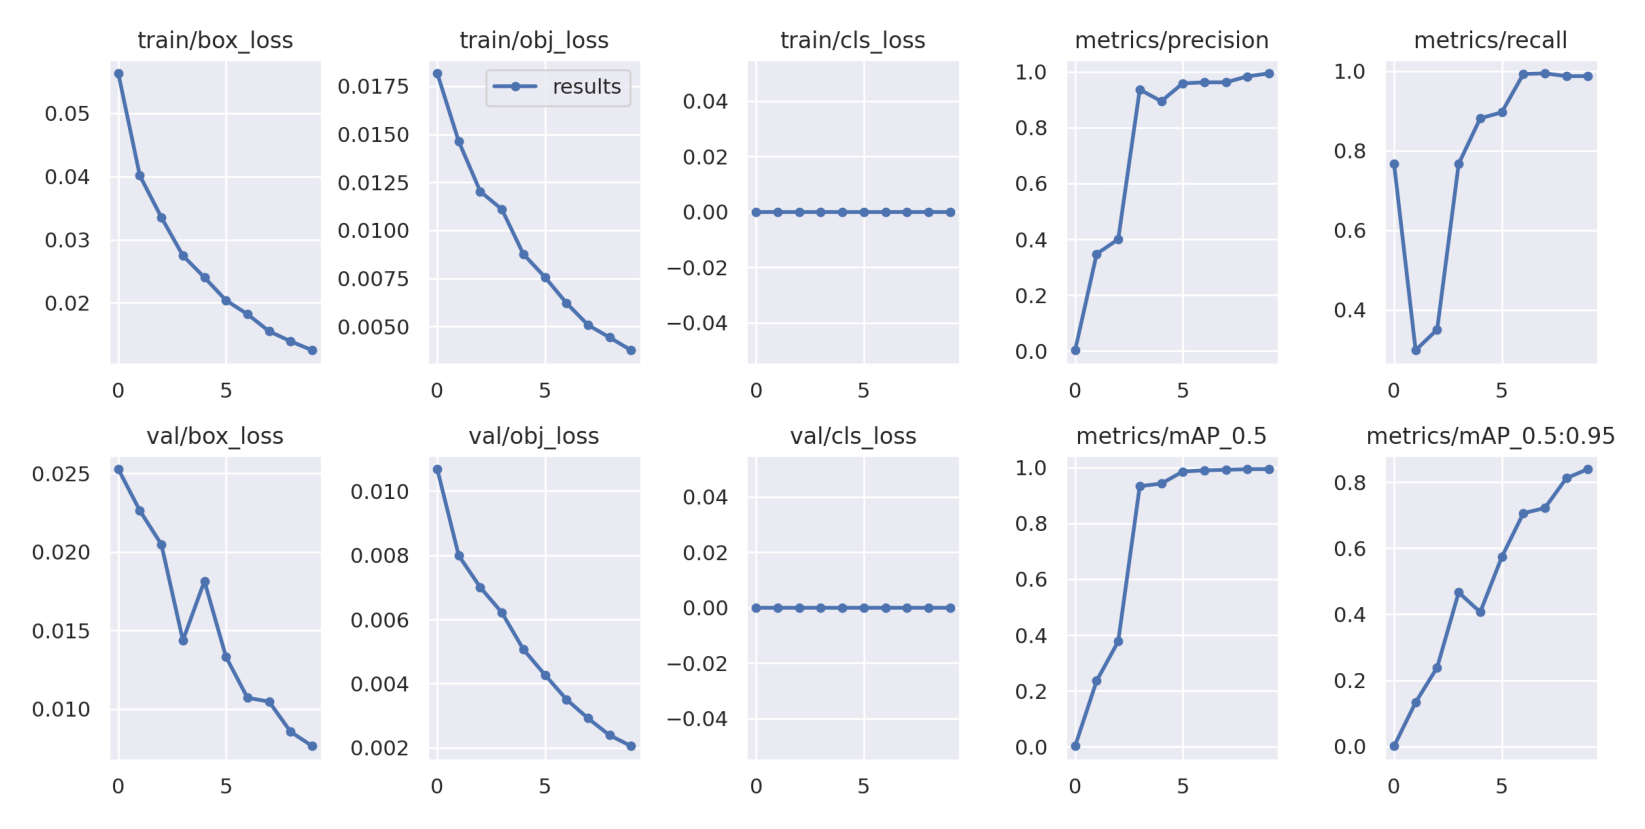

In [14]:
# Выведем графики обучения модели на 10 эпохах (укажем путь к картинке в которую сохраняется результат)
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('../yolov5/runs/train/exp/results.png'))

In [ ]:
# Метрики Precision и Recall на графике после 5 эпох приближаются к 1. Графики лоссов выглядят так, будто могут снизиться ещё. Поэтому попробуем обучить модель на 15 эпохах.

In [16]:
!python train.py --img 640\
--batch 10\
--epochs 15\
--data '../data.yaml'\
--weights yolov5m6.pt

wandb: Currently logged in as: anony-moose-411047. Use `wandb login --relogin` to force relogin
train: weights=yolov5m6.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-182-g1158a50 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.

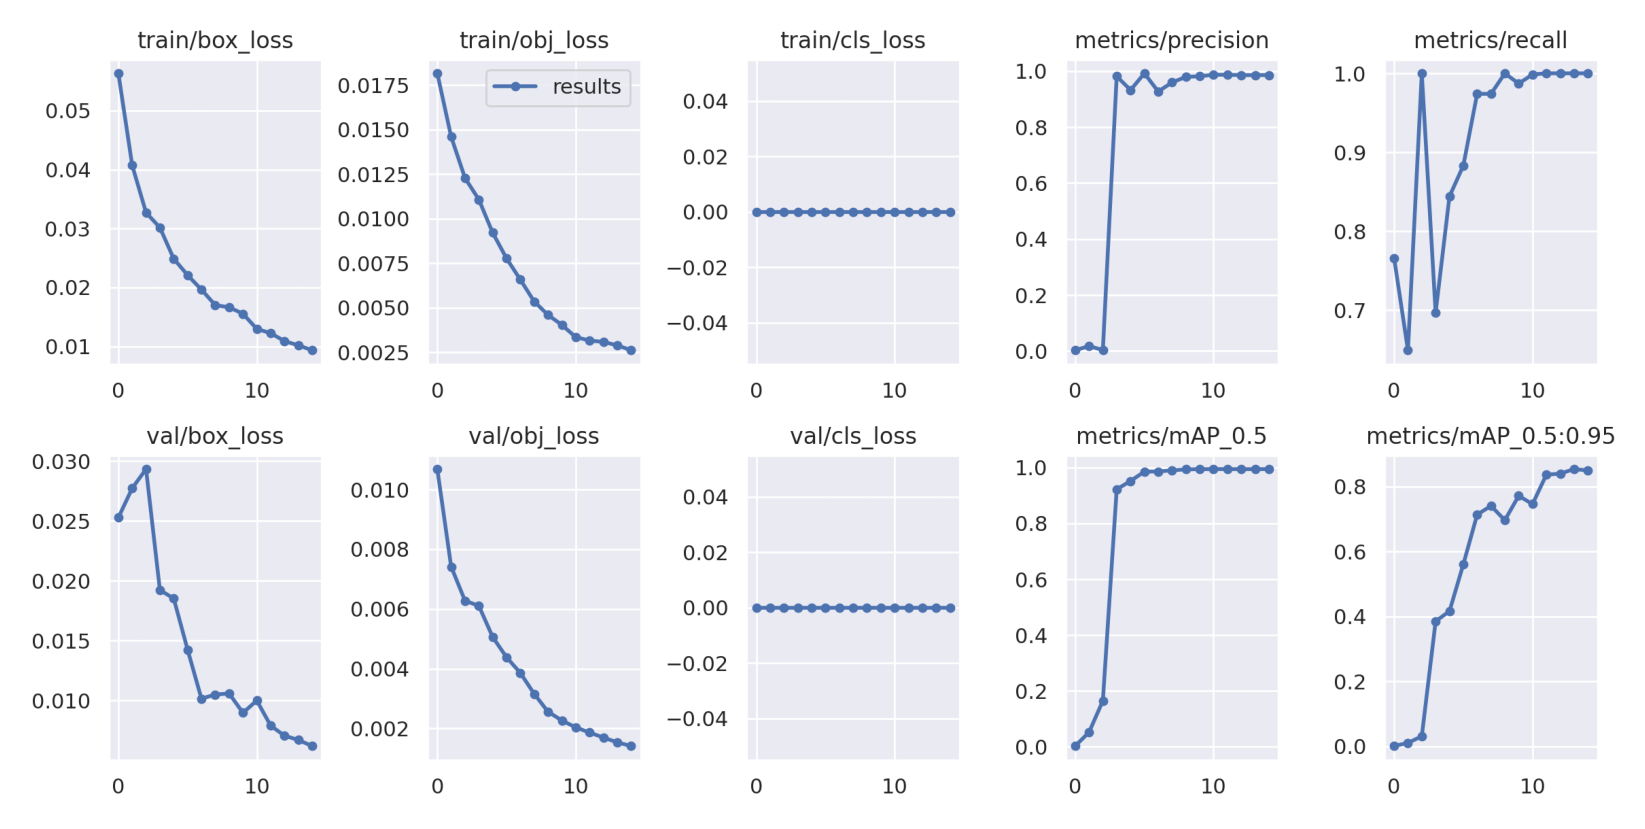

In [18]:
# Выведем графики обучения модели на 15 эпохах (укажем путь к картинке в которую сохраняется результат)
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('../yolov5/runs/train/exp2/results.png'))

In [ ]:
# Лоссы продолжают снижаться. Но из-за слухов на ограничения в colab продолжать эксперименты не рискнул.

YOLOv5 🚀 v6.2-182-g1158a50 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 276 layers, 35248920 parameters, 0 gradients, 48.9 GFLOPs
Adding AutoShape... 


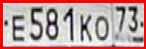

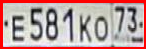

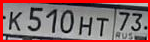

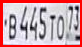

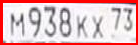

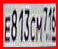

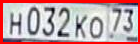

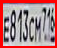

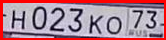

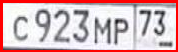

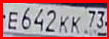

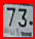

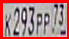

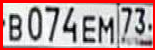

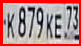

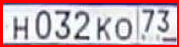

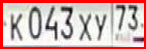

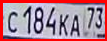

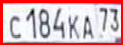

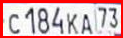

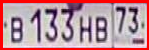

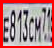

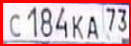

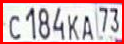

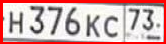

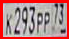

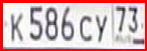

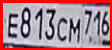

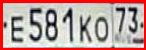

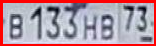

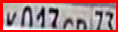

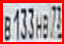

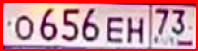

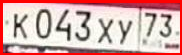

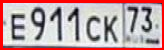

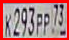

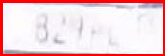

In [20]:

# Путь куда сохранялись веса дообученной модели 
# Путь к папке с файлами yolo
model_path = '../yolov5/runs/train/exp2/weights/best.pt'
yolo_path = '../yolov5'

# Загрузка модели из торч хаб и загрузка в неё ранее сохранённых весов
model_yolo = torch.hub.load(yolo_path, 'custom', path=model_path, source='local')


# Функция нужна для получения из yolo5 координатов баундинг бокса рамки с номером по каждой картинке. Принимает на вход путь к картинке. Выдает координаты рамки и картинку
def get_bboxes(path_to_img):

  image = cv2.imread(path_to_img)
  results = model_yolo([image])

  plates = []
  if results.xyxy[0].shape[0] == 0:
    pass
  else:
    number_of_license_plate = results.xyxy[0].shape[0]
    
    for i in range(0, number_of_license_plate):
      xmin = results.xyxy[0][i][0]
      ymin = results.xyxy[0][i][1]
      xmax = results.xyxy[0][i][2]
      ymax = results.xyxy[0][i][3]
      confidence = results.xyxy[0][i][4]
      plates.append((xmin, ymin, xmax, ymax, confidence))
  return plates, image


# Функция нужна для отрисовки рамки с найденным гос. номером номером.
# Принимает на вход список баундинг боксов, картинку и порог уверенности
def draw_bboxes(boxes_list, frame, conf = 0.4):
  if len(boxes_list) == 0:
    plate_number = None
        
  else:
    # Отрисовываем рамку с номером, если уверенность выше пороговой 
    for box in boxes_list:
      if box[4] >= conf:
        cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[0]) + (int(box[2])-int(box[0])), int(box[1]) + (int(box[3])-int(box[1]))), (0, 0, 255), 3)
        cv2.putText(frame, str(round(float(box[4]),2)) , (int(box[0]), int(box[1])-10), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 0, 255),lineType=cv2.LINE_AA)
        plate_number = frame[int(box[1]): int(box[1]) + (int(box[3])-int(box[1])), int(box[0]): int(box[0]) + (int(box[2])-int(box[0]))]
        #clear_output(wait=True)
        cv2_imshow(plate_number)

      else:
        pass
           



# Путь к тестовой картинке
img_path = '../test/images/'
test_images = os.listdir(img_path)


# Выведем рамки с номерами по каждой картинке из тестового набора данных. Посмотрим, нашла ли область с номером модель.
for img in test_images:
  bboxes, img = get_bboxes(img_path+img)
  draw_bboxes(bboxes, img)


In [ ]:
# Видим, что модель находит область с номером. Для большей наглядности в другом ноутбуке подключим к модели видеофайл и сохраним отрисовынную рамку с номером в другой видео файл. 